best K is= 3


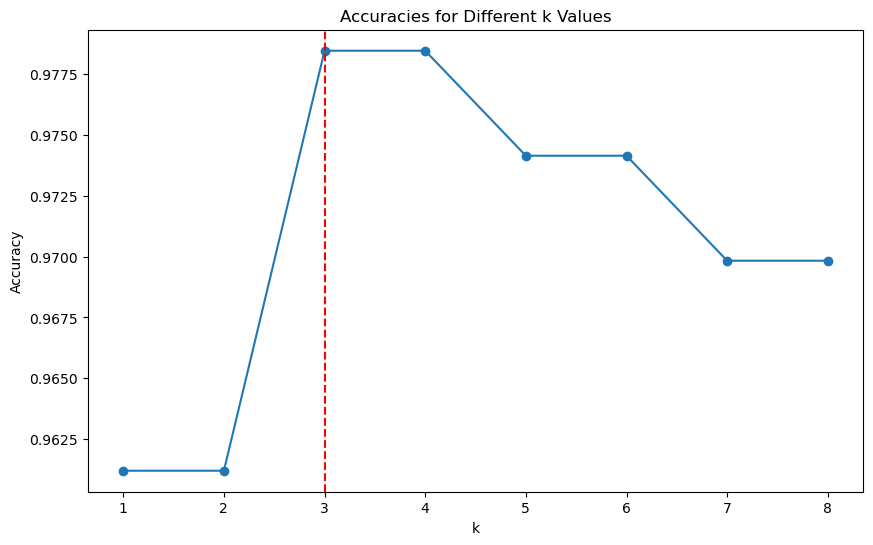

In [5]:

#My library: 
import pandas as pd
import numpy as np
from collections import defaultdict
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt #use for visualizing 

# Load CSV
file_path = 't031.csv'
data = pd.read_csv(file_path)
# Split data# Split data
features = data.iloc[:,:9].values
labels = data.iloc[:, -1].values
# Divide training and testing sets
traindata = features[:466, :]        # Training data (first 466 samples)
trainclass = labels[:466]            # Training labels
testdata = features[466:, :]         # Testing data (remaining samples)
testclass_actual = labels[466:]      # Testing labels
#########################################################################
# knn_classify function
def knn_classify(test_sample, train_data, train_labels, max_k):
# Calculate Euclidean distances between the test sample and all training samples
    dists = np.linalg.norm(train_data - test_sample, axis=1)
# Sort labels according to distances (ascending order of distance)
    sorted_indices = np.argsort(dists)
    sorted_labels = train_labels[sorted_indices]
# Prepare to count the frequencies of k neighbors
    counts = defaultdict(int)
# Initialize the result list to store classifications for each k value (from 1 to max_k)
    results = np.full(max_k, sorted_labels[0])  # Initially fill with the nearest neighbor label
    for i in range(1, max_k + 1):
        # Increase the count of the current neighbor's label
        counts[sorted_labels[i-1]] += 1 
        # Sort counts by frequency, highest first
        sorted_counts = sorted(counts.items(), key=lambda item: item[1], reverse=True)
        # Handle ties: if the top 2 counts are the same, use the previous label
        if len(sorted_counts) > 1 and sorted_counts[0][1] == sorted_counts[1][1]:
            top_label = results[i-2]  # Use the previous classification result
        else:
            top_label = sorted_counts[0][0]  # Assign the most frequent label
        # Store the result for k = i
        results[i-1] = top_label
    return results
###############################################################################
# Perform classification using k-NN for different values of k (1 to 8)
max_k = 8
testclass_pred = []
for test_sample in testdata:
    knn_results = knn_classify(test_sample, traindata, trainclass, max_k)
    testclass_pred.append(knn_results)
# Check accuracy for each k (1 to max_k)
accuracies = []
for k in range(1, max_k + 1):
    predicted_k = [result[k-1] for result in testclass_pred]  # Extract predictions for k
    accuracy = accuracy_score(testclass_actual, predicted_k)
    accuracies.append(accuracy)
#the smallest k with the highest accuracy
best_k = np.argmax(accuracies) + 1
accuracies, best_k
print('best K is=',best_k)
###############################################################################
#visualizing the best K and i find k=4 and k=3 are same but we want smaller than so k = 3 
# Check accuracy for each k (1 to max_k)
accuracies = []

for k in range(1, max_k + 1):
    predicted_k = [result[k-1] for result in testclass_pred]  # Extract predictions for k
    accuracy = accuracy_score(testclass_actual, predicted_k)
    accuracies.append(accuracy)
# Find the best value of k (the smallest k with the highest accuracy)
best_k = np.argmax(accuracies) + 1
# Plot accuracies
plt.figure(figsize=(10, 6))
plt.plot(list(range(1, max_k + 1)), accuracies, marker='o')
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.title('Accuracies for Different k Values')
plt.axvline(x=best_k, linestyle='--', color='r')
plt.show()